# Results

In this section, I elaborate on the dynamics of inflation: how each variable influences the acceleration of increase in prices over time, and what differentiates between Latin American countries. I compute the relative importance of each variable in the inflationary process. The tools show valuable information. However, it is important to notice that this measure is relative and not an absolute value.

## Preliminaries

First, it is necessary to import some libraries.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

g=globals()

I'll use a `ggplot` theme for the graphs in this notebook.

In [53]:
!git clone https://gist.github.com/markusdumke/572e2a8546c54b322b48c0c792799b77 bw
theme_bw = './bw/theme_bw.mplstyle'
plt.style.use(theme_bw)

fatal: destination path 'bw' already exists and is not an empty directory.


Next, I import the Data Frames constructed in the previous [section](./03-Determinants.ipynb) and I build a panel with all the series.

In [135]:
countries = {'arg':'Argentina',
            'bra':'Brazil',
            'chl':'Chile',
            'col':'Colombia',
            'cri':'Costa Rica',
            'mex':'Mexico'
            }

vars = {'m2':'Money Supply',
        'mpr':'Interest Rates',
        'uscpi':'US Inflation',
        'er':'Exchange Rates',
        'cons':'Consumption',
        'ppi':'Producer Prices',
        'ie':'Expectations'}

for c in countries:
    g[f'ir_{c}'] = pd.read_excel('./data/ir.xlsx',
        sheet_name=c,
        index_col = 'date')

ir = pd.concat([g[f'ir_{c}'] for c in countries], keys=countries)

```{note}
As I've updated the model with series that were not available before, new conclussions have shown. The graphs in this section are, for the moment, the same as in the original document.
```

Below is the code used to graph the variables' mean relative importance.

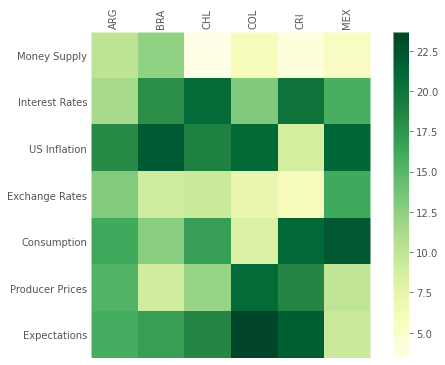

In [137]:
ir_vars = pd.DataFrame()
for c in countries:
    ir_vars[c] = ir.loc[c].mean()

f_vars, a_vars = plt.subplots(figsize=(8,6))

raster  = a_vars.imshow(ir_vars, cmap="YlGn")
f_vars.colorbar(raster)

a_vars.set_xticks([0,1,2,3,4,5])
a_vars.set_yticks([0,1,2,3,4,5,6])

a_vars.set_xticklabels((c.upper() for c in countries), rotation=90)
a_vars.set_yticklabels(vars.values())

a_vars.grid(False)
a_vars.xaxis.tick_top()
a_vars.tick_params(axis='both', which='both', length=0)

f_vars.savefig(f'./figures/ir_vars.png', bbox_inches='tight', dpi=100)

And also the relative importance by theory.

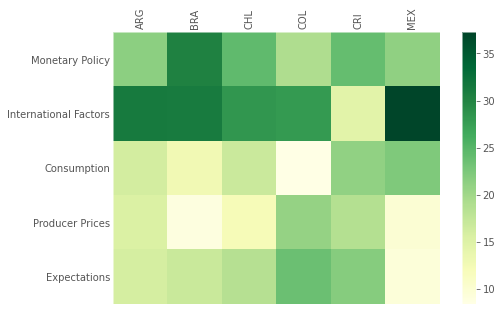

In [164]:
ir_th = pd.DataFrame()

ir_th['Monetary Policy'] = ir_vars.iloc[0:2].sum()
ir_th['International Factors'] = ir_vars.iloc[2:4].sum()
ir_th['Consumption'] = ir_vars.loc['cons']
ir_th['Producer Prices'] = ir_vars.loc['ppi']
ir_th['Expectations'] = ir_vars.loc['ie']

ir_th = ir_th.T

f_th, a_th = plt.subplots(figsize=(8,5))

raster  = a_th.imshow(ir_th, cmap="YlGn")
f_th.colorbar(raster)

a_th.set_xticks([0,1,2,3,4,5])
a_th.set_yticks([0,1,2,3,4])

a_th.set_xticklabels((c.upper() for c in countries), rotation=90)
a_th.set_yticklabels(ir_th.index)

a_th.grid(False)
a_th.xaxis.tick_top()
a_th.tick_params(axis='both', which='both', length=0)

f_th.savefig(f'./figures/ir_theories.png', bbox_inches='tight', dpi=100)

## Latin America: A Heterogeneous Region

I first describe the general results. Figure [4](fig-theories) summarises the average importance of each possible explanation throughout the 2020-2022 period. It is evident that monetary and international factors are the most relevant. Some countries show a more noticeable tendency, such as Costa Rica with an average of 48% of its inflation shift driven by the monetary policy; or Argentina, with international factors representing 38% of its variations. In contrast, Brazil and Colombia are remarkably affected by cost-push schemes, which represent the third more relevant theory in terms of average effects. Lastly, demand-pull and rational expectations share the last place with approximately 12% of influence for all countries. Despite this, expectations seem to be more equally distributed in a range from 10% to 16%, while demand-pull’s average is markedly determined by Chile and Mexico with 21% and 18%, respectively.

:::{figure-md} fig-theories
<img src='./figures/Original/theories.png'>

Inflation Theories, average importance (%), 2020-2022
:::

The relative effects of each variable reflect a considerably heterogeneous background for Latin American countries. Figure [5](fig-vars) presents a disaggregation of monetary and international factors. Technically, the predominant determinant is Producer Price Index, but this is on average and clear that Brazil strongly affects the mean value, having the stat a standard deviation of 10.86 pp. Next, there is what seems to be a familiar bold determinant: the United States inflation rate, which is not surprising considering the strong macroeconomic relations that Latin American countries and the US share, and the 2020-2022 circumstances that have disturbed all regions worldwide.

:::{figure-md} fig-vars
<img src='./figures/Original/vars.png'>

Inflation Determinants, average importance (%), 2020-2022
:::

Furthermore, policy-related interest rates account for most of monetary policy effects (and with higher standard deviation), being almost all out of six countries relatively more driven by interest rates in contrast with money supply, except for Brazil. Moreover, Costa Rica and Chile are not only the two countries more greatly influenced by interest rates but also the less affected by M2. On the other hand, private consumption and inflation expectations show the same relative importance, and Chile leads both measurements. Consumption displays a higher standard deviation in contrast to expectations, as previously analysed. Finally, the least relevant variable throughout the period is the nominal exchange rate with an average relative influence of 9%.

## Time-varying Determinants

It is evident from the analysis that Latin America displays heterogeneity between countries in terms of the average effects. Then, an important question arises: Do countries individually follow a specific path throughout the period? The answer is no, as the tested variables display horizontal differences for each country; that is, there can be highly marked determinants of inflation on average, but they generally vary from one year to another, even between months.

:::{figure-md} fig-m2

<img src='./figures/Original/m2.png'>

Money Supply, average importance (%), 2020-2022
:::

:::{figure-md} fig-mpr

<img src='./figures/Original/mpr.png'>

Interest Rates, average importance (%), 2020-2022
:::

:::{figure-md} fig-uscpi

<img src='./figures/Original/uscpi.png'>

US Inflation, average importance (%), 2020-2022
:::

:::{figure-md} fig-er

<img src='./figures/Original/er.png'>

Exchange Rates, average importance (%), 2020-2022
:::

:::{figure-md} fig-cons

<img src='./figures/Original/cons.png'>

Consumption, average importance (%), 2020-2022
:::

:::{figure-md} fig-ppi

<img src='./figures/Original/ppi.png'>

Producer Prices, average importance (%), 2020-2022
:::

:::{figure-md} fig-ie

<img src='./figures/Original/m2.png'>

Inflation Expectations, average importance (%), 2020-2022
:::

The determinants of inflation have a fluctuating context, and it is optimal to observe specific examples of this behavior. The above figures illustrate the average importance of each variable by year. As a result, the United States inflation rates highly influence Latin American countries. Throughout the period, this international factor showed an importance of at least 10% and values up to 32% in Costa Rica and Mexico, respectively, in 2020. Furthermore, Argentina exhibits the stronger relation between U.S. and local inflation, with a minimum influence of 23% in 2021. The previous analysis excludes Brazil because it displayed, on average, only 5% of inflation related to this factor during the whole period.

The strongest effect of a single variable corresponds to policy-related rates in Costa Rica. On average, MPRs determined 62% and 35% of the country’s inflation in 2020 and 2021, respectively. This variable also influenced almost a fifth of Chile’s inflation. It is important to note that MPRs show significantly high standard deviations, with an approximated maximum value of 21pp in 2020. It also displays larger medians than means, which leads to think about heterogeneous effects.

Another relevant result comes from Chile and the role of private consumption, which not only determines on average more than a fifth of the country’s inflation during the years but exhibits an increasing tendency. That is, Chile’s inflation has been each year more dependent on demand-pull factors, reaching a relative influence of 25% in both 2021 and 2022. Similarly, Mexico presented an increasing path, and demand-pull drives a quarter of inflation in 2022. What’s more interesting: it was the least relevant determinant for the North American country in 2020. In general, for all countries, indicators reveal that private consumption represented a higher impact on inflation in 2022, in contrast with 2020.

Cost-push factors strongly influenced the acceleration of the increase in prices in Brazil and Colombia but in different ways. Brazil reveals a decreasing tendency in producer prices importance, while Colombia was each year more influenced by this factor. However, it is vital to note that almost half of Brazil’s inflation was determined by cost-push components in 2020 and by a still large share of 32% in 2022. Similarly, the results exhibit that Colombia had more constant shifts than Brazil, increasing each year by approximately 5pp, whereas Brazil displayed a decrease of 14pp between 2020 and 2021.

Money supply effects in Brazil widely excel the average importance by 8pp. Unlike cost-push factors, the influence of M2 on Brazil’s inflation has increased throughout the period, causing almost a quarter of it in 2022. In contrast, the money supply became relatively less important in Argentina, with a 10pp decrease from 2020 to 2022.


Expectations effects in Costa Rica increased significantly, determining almost a third of the country’s inflation in 2022. This indicator has similarly affected all countries throughout the period, having the minimum standard deviation across variables, with 2.34pp. Likewise, another factor with data clustered around the mean is the exchange rate. However, it is relevant to note that this was the least crucial variable with an average impact of 8.67%, and only Mexico experimented values higher than 15% of inflation driven by this determinant.

Even the principal determinant of inflation varies between years. In 2020, it is the United States inflation rate, whereas producer prices represent, on average, the leading determinant of inflation in 2021 and 2022. Overall, the varying nature of these variables extends to shorter periods, as pictured in the appendix. Undoubtedly, inflation is not only a fluctuating phenomenon but one strongly responsive to current events.